Імена стовпців у наборі даних: Index(['feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5',
       'target'],
      dtype='object')

Кількість пропущених значень у стовпці target : 0

Приклад бінарної мітки 'target_binary':
   target  target_binary
0       0              0
1       1              1
2       0              0
3       1              1
4       1              1
Epoch 1/10
25/25 [==============================] - 1s 15ms/step - loss: 0.7089 - accuracy: 0.4913 - val_loss: 0.6909 - val_accuracy: 0.5550
Epoch 2/10
25/25 [==============================] - 0s 3ms/step - loss: 0.6999 - accuracy: 0.5213 - val_loss: 0.6932 - val_accuracy: 0.5250
Epoch 3/10
25/25 [==============================] - 0s 2ms/step - loss: 0.7047 - accuracy: 0.4863 - val_loss: 0.6937 - val_accuracy: 0.5150
Epoch 4/10
25/25 [==============================] - 0s 2ms/step - loss: 0.7034 - accuracy: 0.4950 - val_loss: 0.6950 - val_accuracy: 0.5050
Epoch 5/10
25/25 [==============================] - 0s

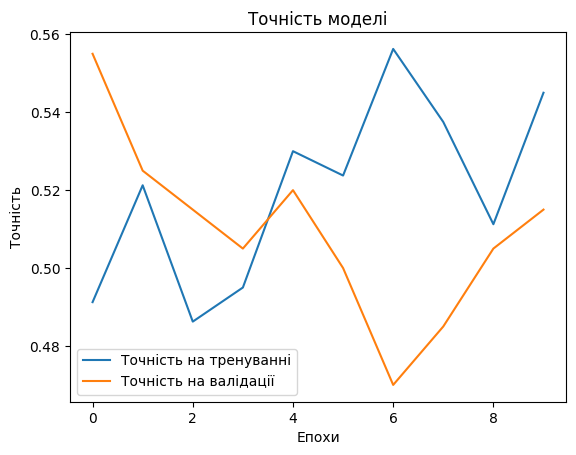

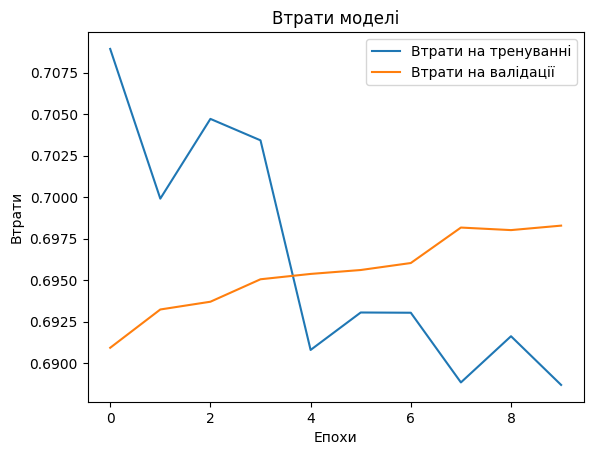

c:\Users\4ykcha\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [1]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Завантажуємо набір даних
data = pd.read_csv('CarPrice_Assignment.csv')

# Перевіряємо імена стовпців
print("Імена стовпців у наборі даних:", data.columns)

# Припускаємо, що стовпець з ціною має назву 'target'. Якщо назва відрізняється, замініть 'target' на правильну.
target_column = 'target'  # замінити на правильне ім'я стовпця, якщо воно інше

# Перевіряємо наявність стовпця 'target'
if target_column not in data.columns:
    print(f"Стовпець '{target_column}' не знайдено. Перевірте правильність імені стовпця!")
else:
    # Якщо потрібно, створюємо бінарну мітку для класифікації: target > 0 = 1 (позитивний клас), інакше 0 (негативний)
    data['target_binary'] = (data[target_column] > 0).astype(int)

    # Перевірка на пропущені значення
    print("\nКількість пропущених значень у стовпці", target_column, ":", data[target_column].isnull().sum())

    # Заповнення пропущених значень середнім значенням
    if data[target_column].isnull().sum() > 0:
        data[target_column].fillna(data[target_column].mean(), inplace=True)
        print("Пропущені значення в стовпці", target_column, "заповнені середнім значенням.")

    # Перевірка бінарної мітки
    print("\nПриклад бінарної мітки 'target_binary':")
    print(data[['target', 'target_binary']].head())

# Перевірка наявності стовпців перед їх видаленням
if target_column in data.columns and 'target_binary' in data.columns:
    # Оновлюємо дані: видаляємо стовпець 'target', оскільки він більше не потрібен для класифікації
    X = data.drop(columns=[target_column, 'target_binary'])  # Виключаємо стовпець 'target_binary' для прогнозування
    y = data['target_binary']  # Використовуємо бінарну мітку як цільову змінну
else:
    print("Стовпці 'target' або 'target_binary' не знайдено. Перевірте попередні етапи.")

# Масштабуємо дані
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Розділяємо дані на тренувальні та тестові набори
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Створюємо модель з Dense шарами (повнозв'язна мережа)
model = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dropout(0.5),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Для бінарної класифікації
])

# Компільовуємо модель
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Тренування моделі
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Оцінка моделі на тестових даних
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Тестова точність: {accuracy*100:.2f}%')

# Візуалізація результатів навчання
plt.plot(history.history['accuracy'], label='Точність на тренуванні')
plt.plot(history.history['val_accuracy'], label='Точність на валідації')
plt.title('Точність моделі')
plt.xlabel('Епохи')
plt.ylabel('Точність')
plt.legend()
plt.show()

# Візуалізація втрат
plt.plot(history.history['loss'], label='Втрати на тренуванні')
plt.plot(history.history['val_loss'], label='Втрати на валідації')
plt.title('Втрати моделі')
plt.xlabel('Епохи')
plt.ylabel('Втрати')
plt.legend()
plt.show()

# Збереження моделі
model.save('car_price_classifier_model.h5')
